In [1]:
import os, geopandas as gpd

#Leemos el archivo de países
countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [2]:
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [3]:
# Revisamos el tipo de archivo
type(countries)

geopandas.geodataframe.GeoDataFrame

In [4]:
# Vemos las dimensiones: filas y columnas
countries.shape

(252, 2)

In [5]:
# Vemos los nombres de las columnas
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [6]:
# Vemos las primeras filas del geopandas dataframe
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [7]:
# Revisamos si hay algunos valores nulos en el geopandas dataframe "countries"
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [8]:
# Vemos la información existente
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

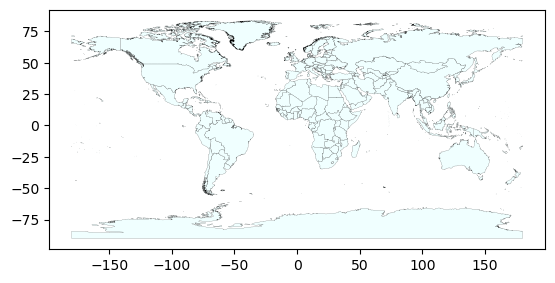

In [9]:
# Vemos la representación gráfica de los países
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [10]:
#Leemos el archivo de ríos
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
#Leemos el archivo de ciudades
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

<Axes: >

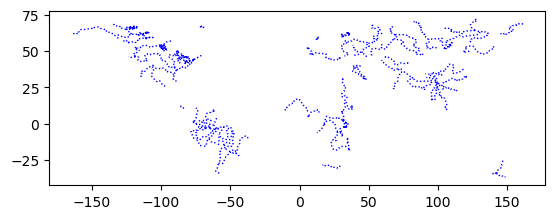

In [11]:
# Vemos la representación gráfica de los ríos
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

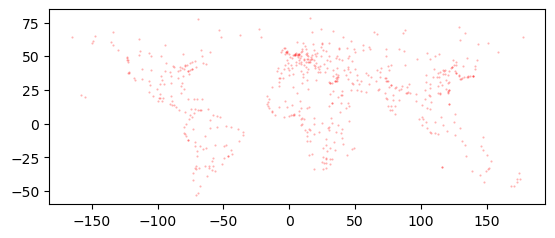

In [12]:
# Vemos la representación gráfica de las ciudades
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

<Axes: >

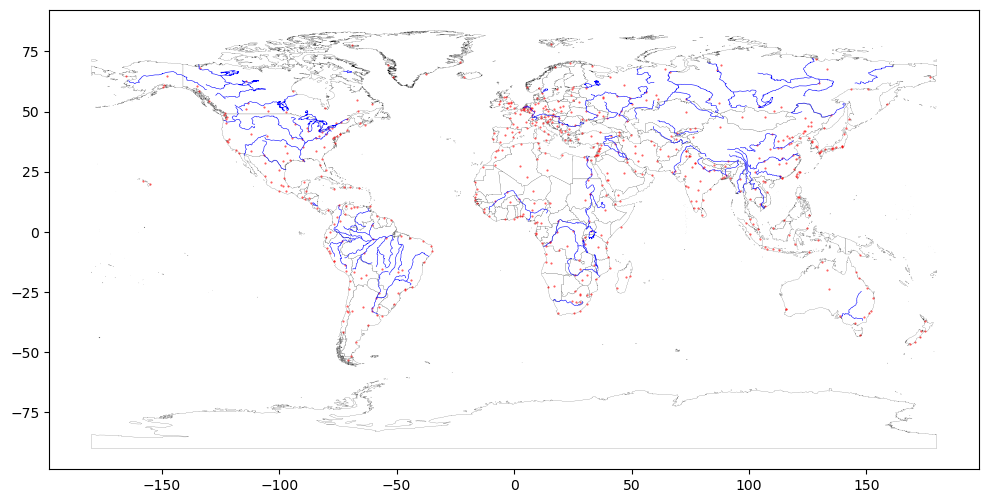

In [13]:
# Vemos la representación gráfica de los países, ríos y ciudades
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [14]:
# Guardamos la información de los 3 archivos en uno único llamado "worldMaps.gpkg"
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [15]:
import pandas as pd

# Leemos el archivo que contiene variables como "fragility", "co2" y "ForestRev_gdp"
fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Officialstatename,InternetccTLD,iso2,iso3,Country,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018


In [16]:
# Leemos el archivo que encontramos en github de una 4ta variable para los ejercicios llamada "HDI"
link_new_variable="https://raw.githubusercontent.com/bromero26/human-development-index/master/hdi_human_development_index.csv"

link_new_variable_df=pd.read_csv(link_new_variable)

# Adaptamos el nombre de la cabecera para hacer un merge luego
link_new_variable_df.rename(columns={'geo': 'Country'}, inplace=True)

# Para este caso solo aplicaremos el HDI del año 2015
link_new_variable_df.rename(columns={'2015': 'HDI'}, inplace=True)

link_new_variable_df['Country'] = link_new_variable_df['Country'].str.upper()

link_new_variable_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,HDI
0,AFGHANISTAN,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,ALBANIA,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,ALGERIA,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,ANDORRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,ANGOLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [17]:
# Creamos un diccionario para actualizar los nombres y así no haya problema al realizar el MERGE
diccionario_cambios = {
    "BAHAMAS": "BAHAMAS (THE)",
    "BOLIVIA": "BOLIVIA (PLURINATIONAL STATE OF)",
    "BRUNEI":"BRUNEI DARUSSALAM",
    "CAPE VERDE":"CABO VERDE",
    "CENTRAL AFRICAN REPUBLIC":"CENTRAL AFRICAN REPUBLIC (THE)",
    "COMOROS":"COMOROS (THE)",
    "CONGO, DEM. REP.":"CONGO (THE DEMOCRATIC REPUBLIC OF THE)",
    "CONGO, REP.": "CONGO (THE)",
    "COTE D'IVOIRE":"CÔTE D'IVOIRE",
    "CZECH REPUBLIC":"CZECHIA",
    "DOMINICA":"DOMINICAN REPUBLIC (THE)",
    "SWAZILAND":"ESWATINI",
    "GAMBIA":"GAMBIA (THE)",
    "IRAN":"IRAN (ISLAMIC REPUBLIC OF)",
    "SOUTH KOREA":"KOREA (THE REPUBLIC OF)",
    "KYRGYZ REPUBLIC":"KYRGYZSTAN",
    "LAO":"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
    "MACEDONIA, FYR":"NORTH MACEDONIA",
    "MICRONESIA, FED. STS.":"MICRONESIA (FEDERATED STATES OF)",
    "MOLDOVA":"MOLDOVA (THE REPUBLIC OF)",
    "NETHERLANDS":"NETHERLANDS (THE)",
    "NIGER":"NIGER (THE)",
    "PHILIPPINES":"PHILIPPINES (THE)",
    "RUSSIA":"RUSSIAN FEDERATION (THE)",
    "SLOVAK REPUBLIC":"SLOVAKIA",
    "SUDAN":"SUDAN (THE)",
    "TANZANIA":"TANZANIA, THE UNITED REPUBLIC OF",
    "UNITED ARAB EMIRATES":"UNITED ARAB EMIRATES (THE)",
    "UNITED KINGDOM":"UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)",
    "UNITED STATES":"UNITED STATES OF AMERICA (THE)",
    "VIETNAM":"VIET NAM"
}

# Reemplazamos los valores con el diccionario
link_new_variable_df['Country'] = link_new_variable_df['Country'].replace(diccionario_cambios)

In [18]:
# Realizamos el merge basado en la columna "Country"
fragilityCia = pd.merge(fragilityCia, link_new_variable_df[['Country', 'HDI']],
                       on='Country', how='left')


In [19]:
fragilityCia['HDI_date'] = '2015'

In [20]:
# Convertimos todos los valores de la columna 'COUNTRY' a mayúsculas en el DataFrame countries.
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [21]:
# Identificamos los países que están presentes en el conjunto de datos de "onlyFragilCia" pero no en el conjunto de datos de países del mapa, y viceversa.
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [22]:
#pip install thefuzz

In [23]:
from thefuzz import process

# Generamos una lista de tuplas donde cada tupla contiene un país del conjunto onlyFragilCia y su mejor coincidencia (basada en la similitud) encontrada en el conjunto onlyMap.
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH M

In [24]:
# Filtramos y generamos una lista de tuplas que contienen países del conjunto onlyFragilCia junto con su mejor coincidencia 
# encontrada en onlyMap, limitando las coincidencias a aquellas con una similitud del 90% o más.
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia) 
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('WESTERN SAMOA', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (THE)', 

In [25]:
# Intentamos crear un diccionario (try1) que empareja cada país de onlyFragilCia con su mejor coincidencia encontrada en 
# onlyMap, asegurándonos de que la similitud sea del 90% o más.
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia) 
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'WESTERN SAMOA',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',
 'VIET

In [26]:
# Reemplazamos los nombres de países en la columna 'Country' del dataframe fragilityCia usando el diccionario try1 creado 
# previamente para encontrar coincidencias entre onlyFragilCia y onlyMap.
fragilityCia.replace(to_replace={'Country':try1},inplace=True)
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# Luego se identifican nuevas coincidencias potenciales entre los países restantes en onlyFragilCia y onlyMap 
# utilizando el algoritmo de búsqueda de similitud process.extractOne.
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [27]:
# Hacemos un filtrado manual de filas que inician con las siguientes palabras
countries[countries.COUNTRY.str.contains('LAO|ESW|SWA')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
126,LAOS,"POLYGON ((104.25700 17.88763, 104.23943 17.937..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [28]:
# Hacemos los cambios manuales
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)"}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [29]:
# Encontramos las mejores coincidencias de nombres de países de onlyFragilCia en el conjunto onlyMap utilizando el 
# método process.extractOne() y almacena los resultados en el diccionario try2.
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'KOREA (THE REPUBLIC OF)': 'NORTH KOREA',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [30]:
# Actualizamos el DataFrame fragilityCia reemplazando los nombres de países en la columna 'Country' con sus mejores 
# coincidencias encontradas en try2.
fragilityCia.replace(to_replace={'Country':try2},inplace=True)
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# Luego, se identifican nuevas coincidencias entre los países restantes en fragilityCia y countries.COUNTRY utilizando 
# process.extractOne().
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [31]:
# Hacemos un MERGE entre los países y sus variables
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# Observamos la información del nuevo GeoDataFrame, en "iso2" hay un valor menos pero no hay problema porque no haremos
# ninguna operación con esa columna
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            171 non-null    object  
 1   geometry           171 non-null    geometry
 2   Officialstatename  171 non-null    object  
 3   InternetccTLD      171 non-null    object  
 4   iso2               170 non-null    object  
 5   iso3               171 non-null    object  
 6   fragility_date     171 non-null    int64   
 7   fragility          171 non-null    float64 
 8   co2                171 non-null    float64 
 9   co2_date           171 non-null    int64   
 10  region             171 non-null    object  
 11  ForestRev_gdp      171 non-null    float64 
 12  ForestRev_date     171 non-null    int64   
 13  HDI                171 non-null    float64 
 14  HDI_date           171 non-null    object  
dtypes: float64(4), geometry(1), int64(3), object(7)
m

## 1. Transformamos las variables fragility, co2, ForestRev_gdp y HDI (nueva variable agregada)

In [32]:
# Apreciamos las 3 variables que existían con anterioridad y la 4ta que buscamos en un repositorio de GitHub
DataNames=['fragility', 'co2', 'ForestRev_gdp', 'HDI']

In [33]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.400
1,fragility,105.000
2,fragility,75.400
3,fragility,73.200
4,fragility,58.900
...,...,...
679,HDI,0.579
680,HDI,0.516
681,HDI,0.418
682,HDI,0.689


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


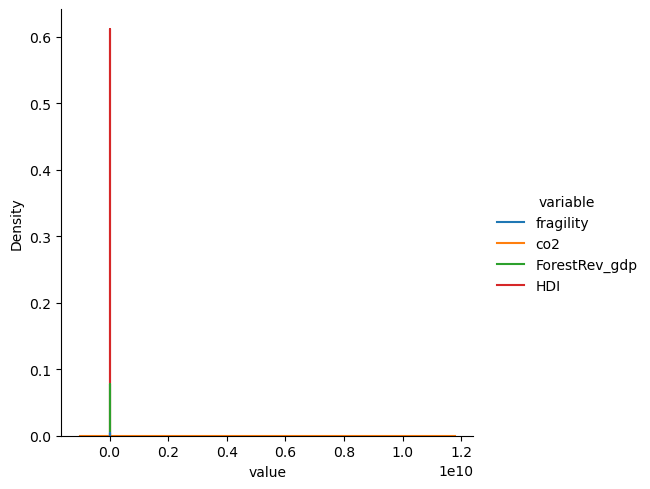

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Utilizamos Seaborn y Matplotlib para crear un gráfico de densidad
sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [35]:
#!pip install -U scikit-learn

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


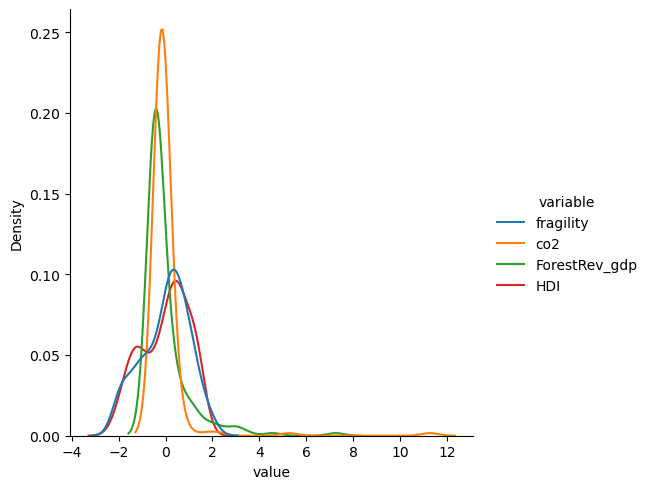

In [36]:
from sklearn.preprocessing import StandardScaler

# Utilizamos Scikit-learn para estandarizar los datos del DataFrame theMapAndData utilizando StandardScaler, y luego crea 
# un gráfico de densidad (KDE) de los datos normalizados.
scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


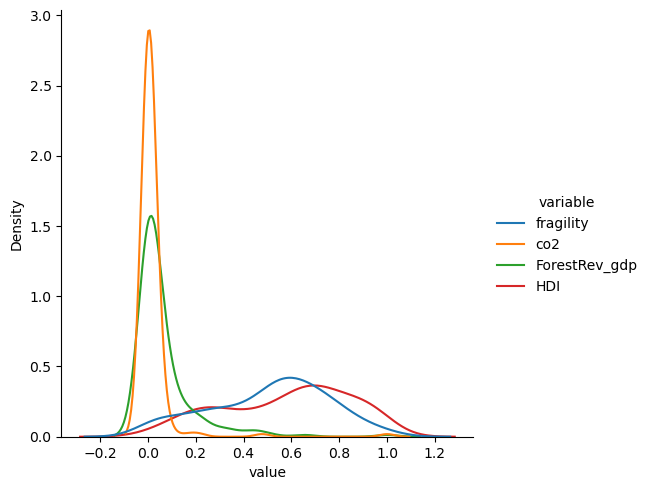

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Utiliza MinMaxScaler de Scikit-learn para escalar los datos del DataFrame theMapAndData al rango de 0 a 1, y luego crea 
# un gráfico de densidad (KDE) de los datos escalados.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


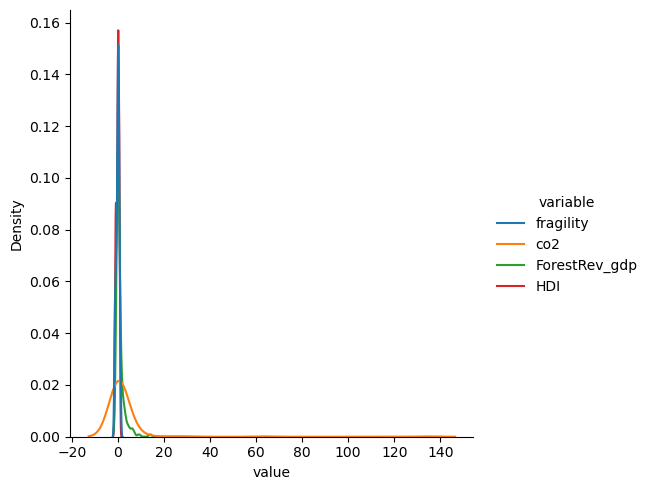

In [38]:
from sklearn.preprocessing import RobustScaler

# Utilizamos RobustScaler de Scikit-learn para escalar los datos del DataFrame theMapAndData utilizando la mediana y el rango 
# intercuartílico, lo cual es útil cuando los datos contienen valores atípicos. Luego, crea un gráfico de densidad (KDE) de los 
# datos escalados.
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


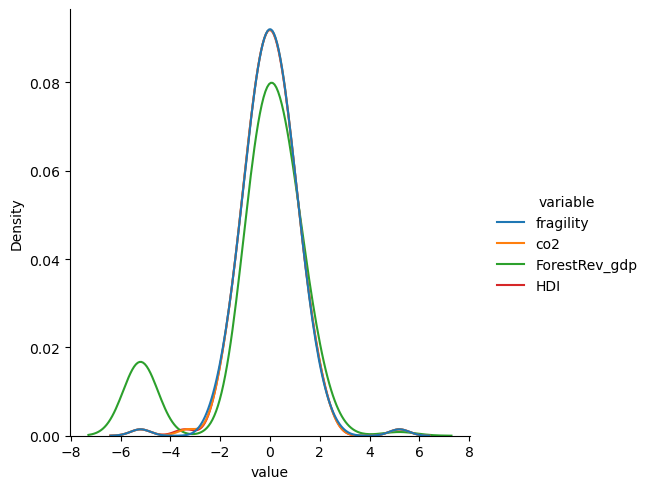

In [39]:
from sklearn.preprocessing import QuantileTransformer

# Utilizamos QuantileTransformer de Scikit-learn para transformar los datos del DataFrame theMapAndData a una distribución 
# normal utilizando cuantiles, y luego crea un gráfico de densidad (KDE) de los datos transformados.
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

## 1.1. Elegimos la variable fragility para luego discretizarla

In [40]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

In [41]:
#! pip show numba mapclassify numpy

In [42]:
#pip install mapclassify

## 2.1. Discretizamos el resultado obtenido de la variable fragility

In [43]:
import mapclassify 
import numpy as np

# Establecer una semilla para reproducibilidad
np.random.seed(12345)

# Definimos 5 intervalos
K=5
# Variable a clasificar "fragility"
theVar=theMapAndData.fragility_Qt

# Clasificadores de intervalos
# Intervalos iguales
ei5 = mapclassify.EqualInterval(theVar, k=K)
# Intervalos iguales basados en la media y desviación estándar
msd = mapclassify.StdMean(theVar)
# Cuantiles
q5=mapclassify.Quantiles(theVar,k=K)

# Máximos y mínimos
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# Cabeza y cola
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# Fisher-Jenks
fj5 = mapclassify.FisherJenks(theVar, k=K)
# Jenks-Caspall
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# Máximo P
mp5 = mapclassify.MaxP(theVar, k=K) 

In [44]:
# Lista de clasificadores
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Calcular la Evaluación Automatizada del Diagrama de Clasificación de Mapas (ADCM) para cada clasificador
fits = np.array([ c.adcm for c in class5])
# Convertir los resultados de ADCM en un DataFrame
adcms = pd.DataFrame(fits)
# Añadir nombres de clasificadores como columna
adcms['classifier'] = [c.name for c in class5]
# Renombrar columnas
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

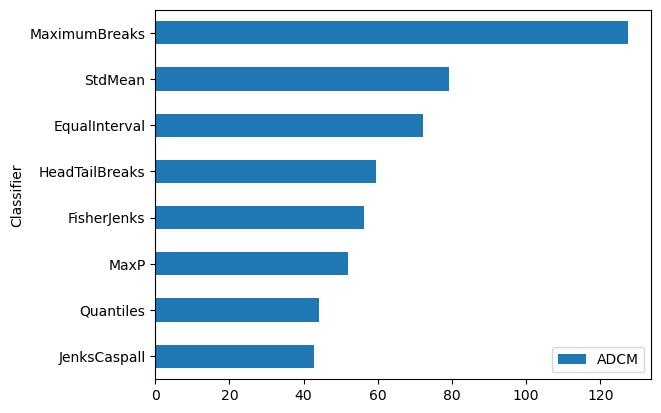

In [45]:
# Graficar los resultados de ADCM en un gráfico de barras horizontales
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [46]:
# Añadir los resultados del clasificador JenksCaspall al DataFrame original
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [47]:
# Mostrar las primeras filas del DataFrame con las columnas fragility_Qt y fragility_Qt_jc5
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

,fragility_Qt,fragility_Qt_jc5
0,-0.530113,1
1,1.827146,4
2,0.304520,3
3,0.233695,2
4,-0.424447,1


In [48]:
# Lista de columnas sobre las cuales agrupar y calcular agregaciones
indexList=['fragility_Qt_jc5']
# Diccionario que define las operaciones de agregación a aplicar
aggregator={'fragility_Qt': ['mean']}

# Aplicar la operación de agrupación y agregación para cada columna en indexList
# Concatenar los resultados verticalmente (axis=1) para formar un DataFrame consolidado
pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,fragility_Qt_jc5,fragility_Qt
,,mean
0,0,-1.685317
1,1,-0.652170
2,2,-0.006005
3,3,0.614405
4,4,1.618874


In [49]:
# Diccionario para renombrar los niveles
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

# Aplicar el reemplazo utilizando el diccionario definido anteriormente
theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# Mostrar las columnas 'fragility_Qt', 'fragility_Qt_jc5' y 'fragility_Qt_jc5_cat' de las primeras 20 filas
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat
0,-0.530113,1,1_Good
1,1.827146,4,4_Poor
2,0.304520,3,3_Bad
3,0.233695,2,2_Middle
4,-0.424447,1,1_Good
5,-0.179018,2,2_Middle
6,0.963642,3,3_Bad
7,-0.760554,1,1_Good
8,-1.963511,0,0_Great
9,-1.436341,0,0_Great


## 3.1. Creamos los mapas de la variable fragility

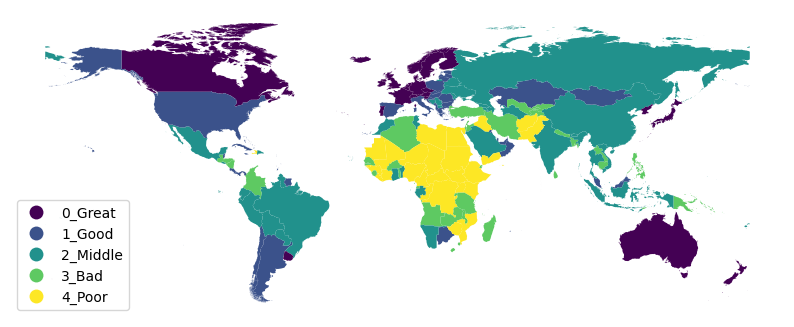

In [50]:
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
f, ax = plt.subplots(1, figsize=(10, 10))

# Crear el gráfico de los datos en el DataFrame `theMapAndData`
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"}, 
        ax=ax
       )

# Desactivar los ejes para una presentación limpia del mapa
ax.set_axis_off()

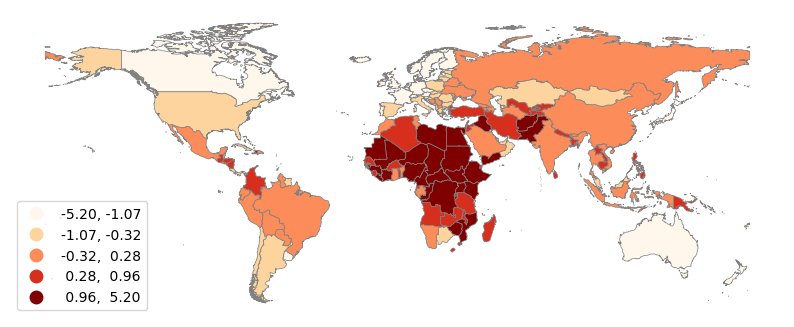

In [51]:
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
f, ax = plt.subplots(1, figsize=(10, 10))

# Crear el gráfico de los datos en el DataFrame `theMapAndData`
theMapAndData.plot(column='fragility_Qt', 
                   cmap='OrRd', 
                   scheme="jenkscaspall",k=5,
        edgecolor='grey', 
        linewidth=0.5, 
        alpha=1, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

# Desactivar los ejes para una presentación limpia del mapa
ax.set_axis_off()

In [52]:
# Guardamos el archivo de GeoDataframe
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

## 1.2. Elegimos la variable co2 para luego discretizarla

In [53]:
theMapAndData['co2_Qt']=QtScaled_data[:,1]

## 2.2 Discretizamos el resultado obtenido de la variable co2

In [54]:
import mapclassify 
import numpy as np

# Establecer una semilla para reproducibilidad
np.random.seed(12345)

# Definimos 5 intervalos
K=5
# Variable a clasificar "co2"
theVar=theMapAndData.co2_Qt

# Clasificadores de intervalos
# Intervalos iguales
ei5 = mapclassify.EqualInterval(theVar, k=K)
# Intervalos iguales basados en la media y desviación estándar
msd = mapclassify.StdMean(theVar)
# Cuantiles
q5=mapclassify.Quantiles(theVar,k=K)

# Máximos y mínimos
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# Cabeza y cola
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# Fisher-Jenks
fj5 = mapclassify.FisherJenks(theVar, k=K)
# Jenks-Caspall
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# Máximo P
mp5 = mapclassify.MaxP(theVar, k=K) 

In [55]:
# Lista de clasificadores
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Calcular la Evaluación Automatizada del Diagrama de Clasificación de Mapas (ADCM) para cada clasificador
fits = np.array([ c.adcm for c in class5])
# Convertir los resultados de ADCM en un DataFrame
adcms = pd.DataFrame(fits)
# Añadir nombres de clasificadores como columna
adcms['classifier'] = [c.name for c in class5]
# Renombrar columnas
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

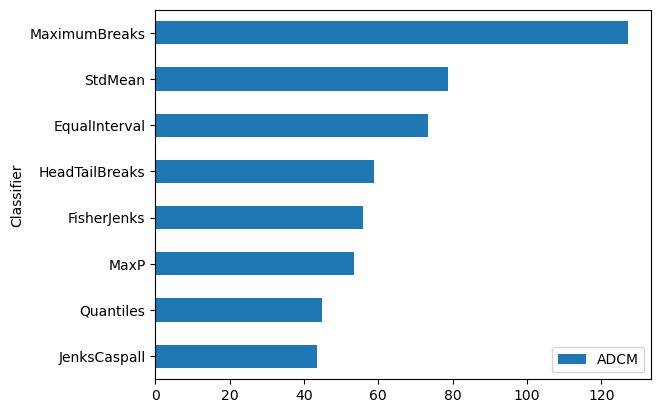

In [56]:
# Graficar los resultados de ADCM en un gráfico de barras horizontales
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [57]:
# Añadir los resultados del clasificador JenksCaspall al DataFrame original
theMapAndData['co2_Qt_jc5'] = jc5.yb

In [58]:
# Mostrar las primeras filas del DataFrame con las columnas co2_Qt y co2_Qt_jc5
theMapAndData[['co2_Qt','co2_Qt_jc5']].head()

,co2_Qt,co2_Qt_jc5
0,-1.417436,0
1,-0.312096,1
2,0.903225,3
3,0.282063,2
4,-0.757475,1


In [59]:
# Lista de columnas sobre las cuales agrupar y calcular agregaciones
indexList=['co2_Qt_jc5']
# Diccionario que define las operaciones de agregación a aplicar
aggregator={'co2_Qt': ['mean']}

# Aplicar la operación de agrupación y agregación para cada columna en indexList
# Concatenar los resultados verticalmente (axis=1) para formar un DataFrame consolidado
pd.concat([theMapAndData[['co2_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,co2_Qt_jc5,co2_Qt
,,mean
0,0,-1.663108
1,1,-0.623926
2,2,0.014829
3,3,0.640064
4,4,1.630121


In [60]:
# Diccionario para renombrar los niveles
newLabelsForLevels={0:"0_Very_Low", 1:"1_Low", 2:"2_Moderate", 3:"3_High", 4:"4_Very_High"}

# Aplicar el reemplazo utilizando el diccionario definido anteriormente
theMapAndData['co2_Qt_jc5_cat']=theMapAndData.loc[:,'co2_Qt_jc5'].replace(newLabelsForLevels)

# Mostrar las columnas 'co2_Qt', 'co2_Qt_jc5' y 'co2_Qt_jc5_cat' de las primeras 20 filas
theMapAndData[['co2_Qt','co2_Qt_jc5','co2_Qt_jc5_cat']].head(20)

,co2_Qt,co2_Qt_jc5,co2_Qt_jc5_cat
0,-1.417436,0,0_Very_Low
1,-0.312096,1,1_Low
2,0.903225,3,3_High
3,0.282063,2,2_Moderate
4,-0.757475,1,1_Low
5,-0.514615,1,1_Low
6,0.106163,2,2_Moderate
7,0.956291,3,3_High
8,1.417745,4,4_Very_High
9,0.593317,3,3_High


## 3.2. Creamos los mapas de la variable co2

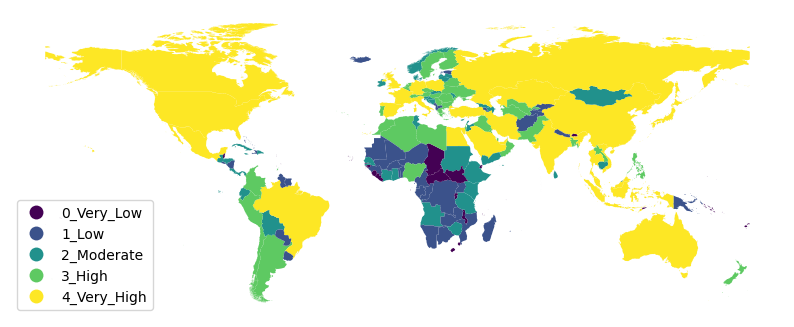

In [61]:
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
f, ax = plt.subplots(1, figsize=(10, 10))

# Crear el gráfico de los datos en el DataFrame `theMapAndData`
theMapAndData.plot(column='co2_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"}, 
        ax=ax
       )

# Desactivar los ejes para una presentación limpia del mapa
ax.set_axis_off()

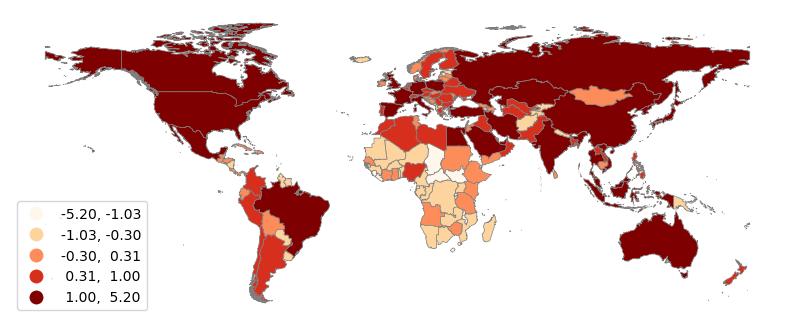

In [62]:
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
f, ax = plt.subplots(1, figsize=(10, 10))

# Crear el gráfico de los datos en el DataFrame `theMapAndData`
theMapAndData.plot(column='co2_Qt', 
                   cmap='OrRd', 
                   scheme="jenkscaspall",k=5,
        edgecolor='grey', 
        linewidth=0.5, 
        alpha=1, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

# Desactivar los ejes para una presentación limpia del mapa
ax.set_axis_off()

In [63]:
# Guardamos el archivo de GeoDataframe
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

## 1.3. Elegimos la variable ForestRev_gdp para luego discretizarla

In [64]:
theMapAndData['ForestRev_gdp_Qt']=QtScaled_data[:,2]

## 2.3. Discretizamos el resultado obtenido de la variable ForestRev_gdp

In [65]:
import mapclassify 
import numpy as np

# Establecer una semilla para reproducibilidad
np.random.seed(12345)

# Definimos 5 intervalos
K=5
# Variable a clasificar "ForestRev_gdp"
theVar=theMapAndData.ForestRev_gdp_Qt

# Clasificadores de intervalos
# Intervalos iguales
ei5 = mapclassify.EqualInterval(theVar, k=K)
# Intervalos iguales basados en la media y desviación estándar
msd = mapclassify.StdMean(theVar)
# Cuantiles
q5=mapclassify.Quantiles(theVar,k=K)

# Máximos y mínimos
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# Cabeza y cola
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# Fisher-Jenks
fj5 = mapclassify.FisherJenks(theVar, k=K)
# Jenks-Caspall
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# Máximo P
mp5 = mapclassify.MaxP(theVar, k=K) 

In [66]:
# Lista de clasificadores
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Calcular la Evaluación Automatizada del Diagrama de Clasificación de Mapas (ADCM) para cada clasificador
fits = np.array([ c.adcm for c in class5])
# Convertir los resultados de ADCM en un DataFrame
adcms = pd.DataFrame(fits)
# Añadir nombres de clasificadores como columna
adcms['classifier'] = [c.name for c in class5]
# Renombrar columnas
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

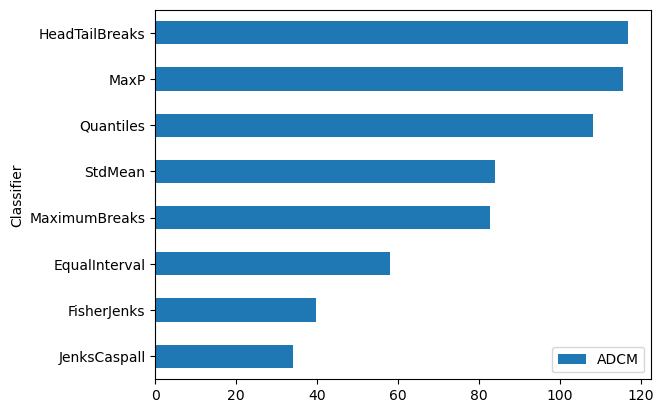

In [67]:
# Graficar los resultados de ADCM en un gráfico de barras horizontales
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [68]:
# Añadir los resultados del clasificador JenksCaspall al DataFrame original
theMapAndData['ForestRev_gdp_Qt_jc5'] = jc5.yb

In [69]:
# Mostrar las primeras filas del DataFrame con las columnas ForestRev_gdp_Qt y ForestRev_gdp_Qt_jc5
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5']].head()

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5
0,-5.199338,0
1,-0.076809,2
2,-0.352465,2
3,-0.827130,1
4,-0.106447,2


In [70]:
# Lista de columnas sobre las cuales agrupar y calcular agregaciones
indexList=['ForestRev_gdp_Qt_jc5']
# Diccionario que define las operaciones de agregación a aplicar
aggregator={'ForestRev_gdp_Qt': ['mean']}

# Aplicar la operación de agrupación y agregación para cada columna en indexList
# Concatenar los resultados verticalmente (axis=1) para formar un DataFrame consolidado
pd.concat([theMapAndData[['ForestRev_gdp_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt
,,mean
0,0,-5.199338
1,1,-0.762467
2,2,-0.050787
3,3,0.635412
4,4,1.657795


In [71]:
# Diccionario para renombrar los niveles
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

# Aplicar el reemplazo utilizando el diccionario definido anteriormente
theMapAndData['ForestRev_gdp_Qt_jc5_cat']=theMapAndData.loc[:,'ForestRev_gdp_Qt_jc5'].replace(newLabelsForLevels)

# Mostrar las columnas 'ForestRev_gdp_Qt', 'ForestRev_gdp_Qt_jc5' y 'ForestRev_gdp_Qt_jc5_cat' de las primeras 20 filas
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5','ForestRev_gdp_Qt_jc5_cat']].head(20)

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt_jc5_cat
0,-5.199338,0,0_Great
1,-0.076809,2,2_Middle
2,-0.352465,2,2_Middle
3,-0.827130,1,1_Good
4,-0.106447,2,2_Middle
5,0.088585,2,2_Middle
6,0.206072,2,2_Middle
7,-0.421391,1,1_Good
8,-0.271880,2,2_Middle
9,-0.536176,1,1_Good


## 3.3. Creamos los mapas de la variable ForestRev_gdp

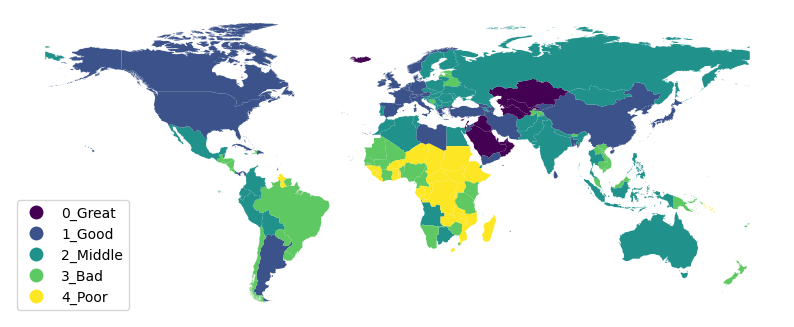

In [72]:
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
f, ax = plt.subplots(1, figsize=(10, 10))

# Crear el gráfico de los datos en el DataFrame `theMapAndData`
theMapAndData.plot(column='ForestRev_gdp_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"}, 
        ax=ax
       )

# Desactivar los ejes para una presentación limpia del mapa
ax.set_axis_off()

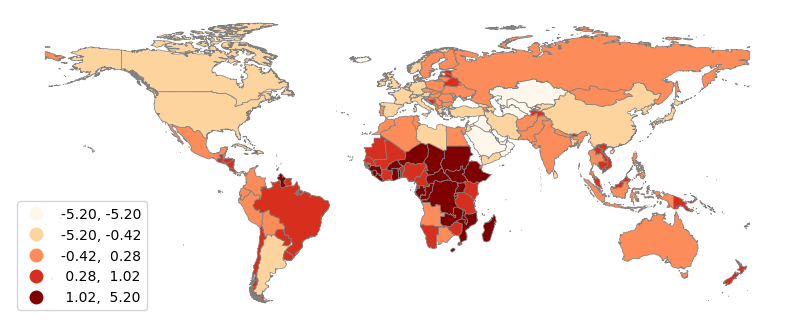

In [73]:
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
f, ax = plt.subplots(1, figsize=(10, 10))

# Crear el gráfico de los datos en el DataFrame `theMapAndData`
theMapAndData.plot(column='ForestRev_gdp_Qt', 
                   cmap='OrRd', 
                   scheme="jenkscaspall",k=5,
        edgecolor='grey', 
        linewidth=0.5, 
        alpha=1, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

# Desactivar los ejes para una presentación limpia del mapa
ax.set_axis_off()

In [74]:
# Guardamos el archivo de GeoDataframe
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

## 1.4. Elegimos la variable HDI para luego discretizarla

In [75]:
theMapAndData['HDI_Qt']=QtScaled_data[:,3]

## 2.4. Discretizamos el resultado obtenido de la variable HDI

In [76]:
import mapclassify 
import numpy as np

# Establecer una semilla para reproducibilidad
np.random.seed(12345)

# Definimos 5 intervalos
K=5
# Variable a clasificar "HDI"
theVar=theMapAndData.HDI_Qt
# Clasificadores de intervalos
# Intervalos iguales
ei5 = mapclassify.EqualInterval(theVar, k=K)
# Intervalos iguales basados en la media y desviación estándar
msd = mapclassify.StdMean(theVar)
# Cuantiles
q5=mapclassify.Quantiles(theVar,k=K)

# Máximos y mínimos
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# Cabeza y cola
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# Fisher-Jenks
fj5 = mapclassify.FisherJenks(theVar, k=K)
# Jenks-Caspall
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# Máximo P
mp5 = mapclassify.MaxP(theVar, k=K) 

In [77]:
# Lista de clasificadores
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Calcular la Evaluación Automatizada del Diagrama de Clasificación de Mapas (ADCM) para cada clasificador
fits = np.array([ c.adcm for c in class5])
# Convertir los resultados de ADCM en un DataFrame
adcms = pd.DataFrame(fits)
# Añadir nombres de clasificadores como columna
adcms['classifier'] = [c.name for c in class5]
# Renombrar columnas
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

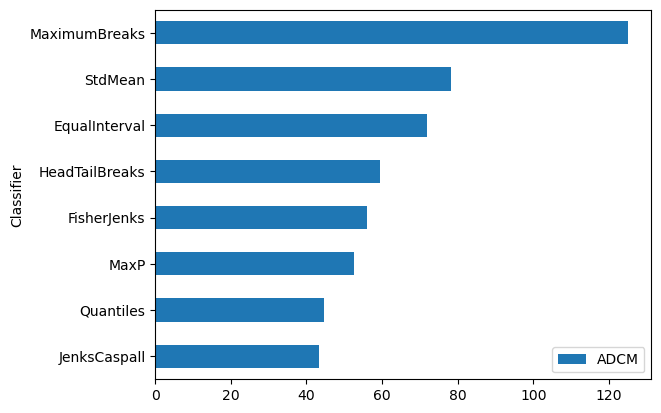

In [78]:
# Graficar los resultados de ADCM en un gráfico de barras horizontales
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [79]:
# Añadir los resultados del clasificador JenksCaspall al DataFrame original
theMapAndData['HDI_Qt_jc5'] = jc5.yb

In [80]:
# Mostrar las primeras filas del DataFrame con las columnas HDI_Qt y HDI_Qt_jc5
theMapAndData[['HDI_Qt','HDI_Qt_jc5']].head()

,HDI_Qt,HDI_Qt_jc5
0,0.429297,3
1,-1.248728,0
2,0.132009,2
3,0.209860,2
4,0.249827,2


In [81]:
# Lista de columnas sobre las cuales agrupar y calcular agregaciones
indexList=['HDI_Qt_jc5']
# Diccionario que define las operaciones de agregación a aplicar
aggregator={'HDI_Qt': ['mean']}

# Aplicar la operación de agrupación y agregación para cada columna en indexList
# Concatenar los resultados verticalmente (axis=1) para formar un DataFrame consolidado
pd.concat([theMapAndData[['HDI_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,HDI_Qt_jc5,HDI_Qt
,,mean
0,0,-1.691506
1,1,-0.650967
2,2,-0.007849
3,3,0.643607
4,4,1.657235


In [82]:
# Diccionario para renombrar los niveles
newLabelsForLevels={0:"0_Poor", 1:"1_Bad", 2:"2_Middle", 3:"3_Good", 4:"4_Great"}

# Aplicar el reemplazo utilizando el diccionario definido anteriormente
theMapAndData['HDI_Qt_jc5_cat']=theMapAndData.loc[:,'HDI_Qt_jc5'].replace(newLabelsForLevels)

# Mostrar las columnas 'HDI_Qt', 'HDI_Qt_jc5' y 'HDI_Qt_jc5_cat' de las primeras 20 filas
theMapAndData[['HDI_Qt','HDI_Qt_jc5','HDI_Qt_jc5_cat']].head(20)

,HDI_Qt,HDI_Qt_jc5,HDI_Qt_jc5_cat
0,0.429297,3,3_Good
1,-1.248728,0,0_Poor
2,0.132009,2,2_Middle
3,0.209860,2,2_Middle
4,0.249827,2,2_Middle
5,0.103609,2,2_Middle
6,-0.787876,1,1_Bad
7,0.690633,3,3_Good
8,2.318758,4,4_Great
9,1.159159,4,4_Great


## 3.3. Creamos los mapas de la variable HDI

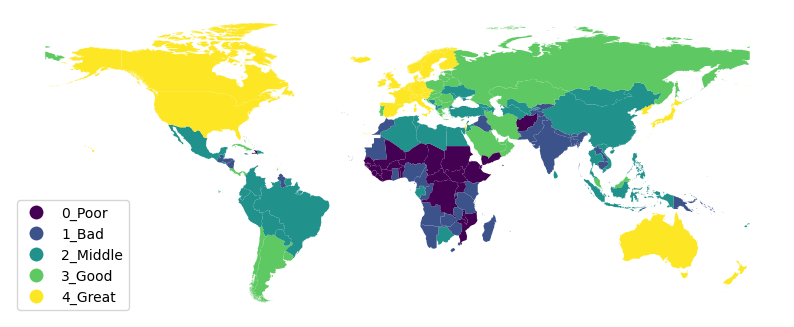

In [83]:
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
f, ax = plt.subplots(1, figsize=(10, 10))

# Crear el gráfico de los datos en el DataFrame `theMapAndData`
theMapAndData.plot(column='HDI_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"}, 
        ax=ax
       )

# Desactivar los ejes para una presentación limpia del mapa
ax.set_axis_off()

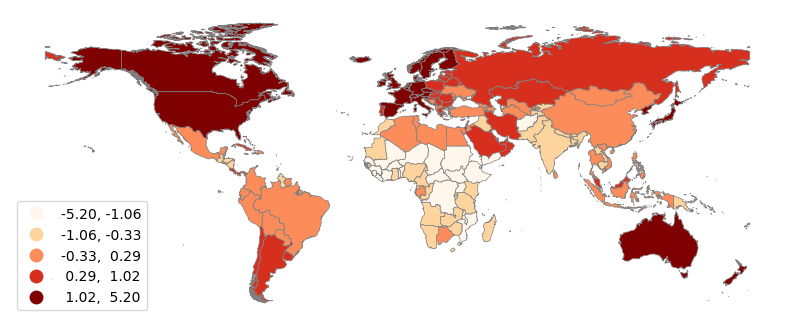

In [84]:
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
f, ax = plt.subplots(1, figsize=(10, 10))

# Crear el gráfico de los datos en el DataFrame `theMapAndData`
theMapAndData.plot(column='HDI_Qt', 
                   cmap='OrRd', 
                   scheme="jenkscaspall",k=5,
        edgecolor='grey', 
        linewidth=0.5, 
        alpha=1, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

# Desactivar los ejes para una presentación limpia del mapa
ax.set_axis_off()

In [85]:
# Guardamos el archivo de GeoDataframe
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")